In [18]:
from openmm.app import *
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt 
import numpy as np

# Load Forcefield

In [2]:
FF = ForceField('charmm36.xml')

# FF parameters are stored in "generator" objects...
Each of which contains the information to create a single Force object. You can call getGenerators() to get the generators for a force field, but their internals aren't documented. You'll need to look at the source code for each one. For example, this prints out the list of available generators:

In [3]:
print("List of generators that hold parameters")
print("\n")
for g in FF.getGenerators(): # loop through generators (i.e. parameters) in ff
    print(g)

List of generators that hold parameters




# We are interested in CMAPTorsionGenerator
Each <map> key defines an energy correction map. Its content is the list of energy values in kJ/mole

In [51]:
for g in FF.getGenerators(): 
    if isinstance(g, forcefield.CMAPTorsionGenerator):
        print("number of maps = ", len(g.maps))
        maps = g.maps # store the map values in "map"
print("each of the 8 maps houses a 24x24 grid of dihedral parameters, for this example let us analyze the first map listed.")

number of maps =  8
each of the 8 maps houses a 24x24 grid of dihedral parameters, for this example let us analyze the first map listed.


# Convert 1D flattened map into 2d 24x24 array

In [53]:
print("Python imports the map parameters as a flattned 1D array. We must revert back to 2D in order to plot.")
cmap = np.reshape(maps[0], (-1, 24)) # reshaped 2D grid, 24x24  


Python imports the map parameters as a flattned 1D array. We must revert back to 2D in order to plot.


# Plot dihedral maps

<function matplotlib.pyplot.show(close=None, block=None)>

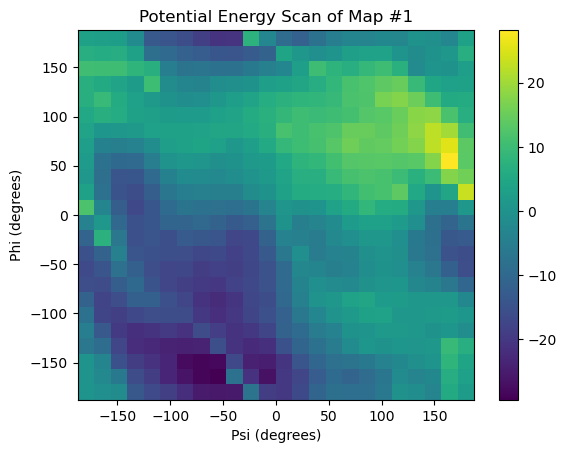

In [54]:
plt.figure()
x = np.linspace(-180, 180, 24)
y = np.linspace(-180, 180, 24)
plt.pcolormesh(x, y, cmap)
plt.colorbar()
plt.title("Potential Energy Scan of Map #1")
plt.xlabel("Psi (degrees)")
plt.ylabel("Phi (degrees)")
plt.show